# <u>Loan Status Prediction System:-</u>

## *In this project, our objective is to conduct an in-depth exploration and analysis of this dataset. We use three distinct classification algorithms—K-Nearest Neighbors (KNN), Naive Bayes, and Logistic Regrssion —to forecast the loan status. Our study includes a comparative examination of the performance of these algorithms based on various evaluation metrics.*

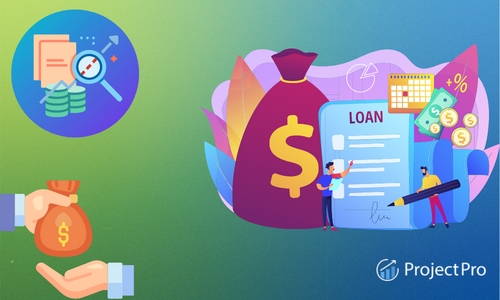

# Let's Start :-

## **Import Required Libraries**

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,recall_score ,precision_score,f1_score
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Get Statistical information about numerical columns**

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Preprocessing :-**

 ## *Checking and removing Missing Values*

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna(inplace=True)

## *Checking duplicate values*

In [7]:
df.duplicated().sum()

0

## Removing outliers from The Dataset using IQR

In [8]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
categorical_cols=df.select_dtypes(include=['object']).columns


def remove_outliers_IQR(original_data, numerical_cols, threshold=3):
    for col in numerical_cols:
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (original_data[col] < lower_bound) | (original_data[col] > upper_bound)
        original_data = original_data[~outliers_mask].reset_index(drop=True)
    return original_data

# Applying the function to remove outliers
new_data = remove_outliers_IQR(df, numerical_cols)

# Displaying number of outliers removed from each numerical column
for col in numerical_cols:
    outliers_removed = len(df[col]) - len(new_data[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}")

Number of outliers removed in ApplicantIncome: 148
Number of outliers removed in CoapplicantIncome: 148
Number of outliers removed in LoanAmount: 148
Number of outliers removed in Loan_Amount_Term: 148
Number of outliers removed in Credit_History: 148


# **Data Analysis & Visualization :-**

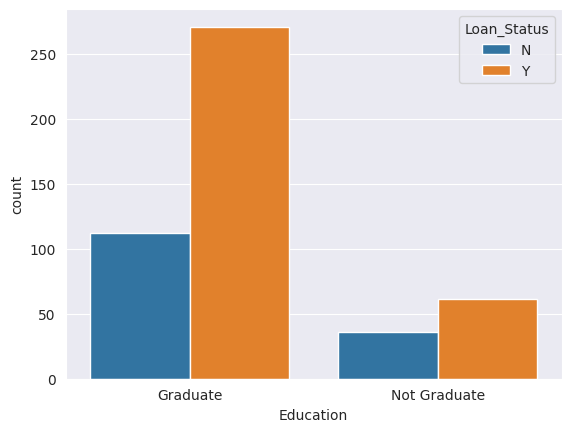

In [9]:
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.show()

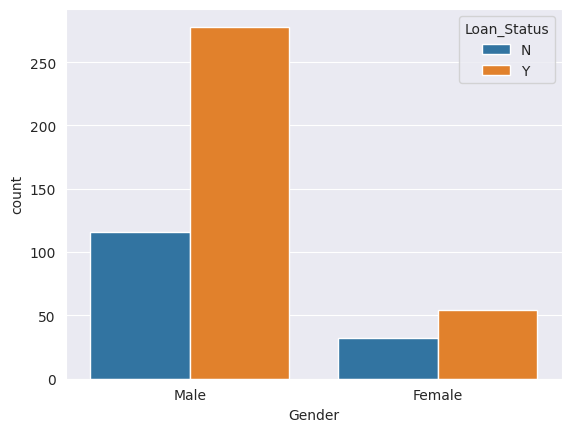

In [10]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.show()

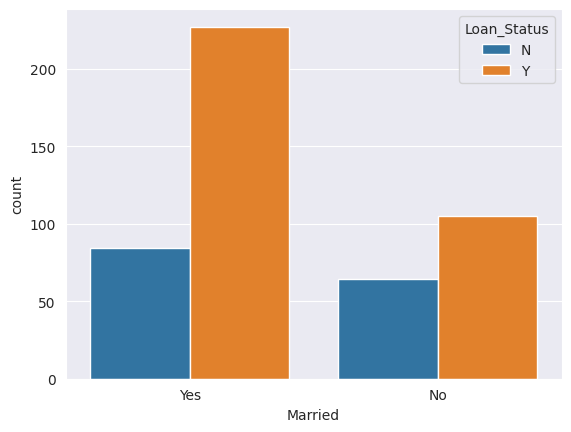

In [11]:
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.show()

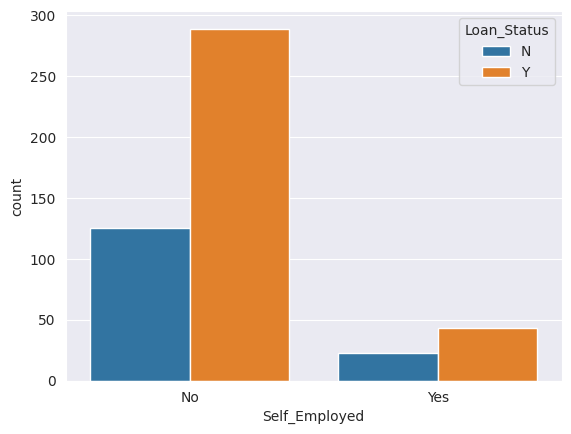

In [12]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)
plt.show()

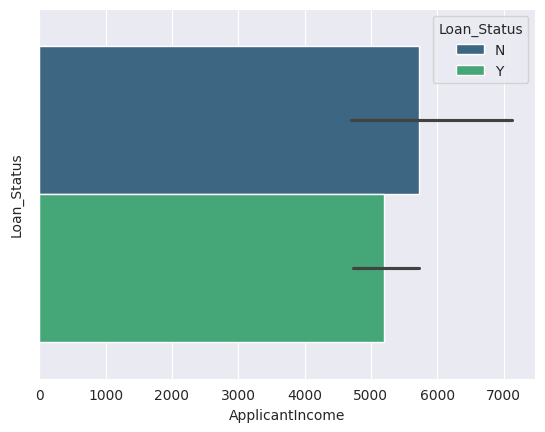

In [13]:
sns.barplot(x='ApplicantIncome',hue='Loan_Status',data=df,palette='viridis')
plt.ylabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

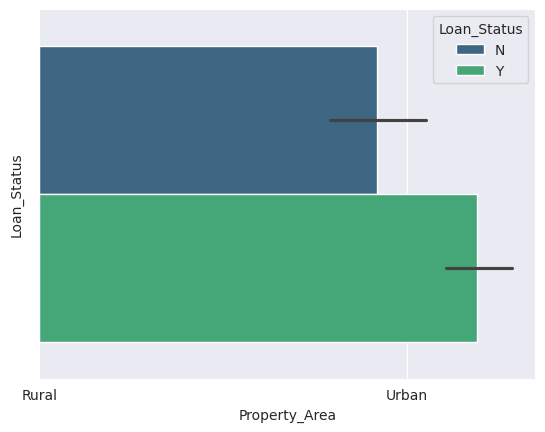

In [14]:
sns.barplot(x='Property_Area',hue='Loan_Status',data=df,palette='viridis')
plt.ylabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

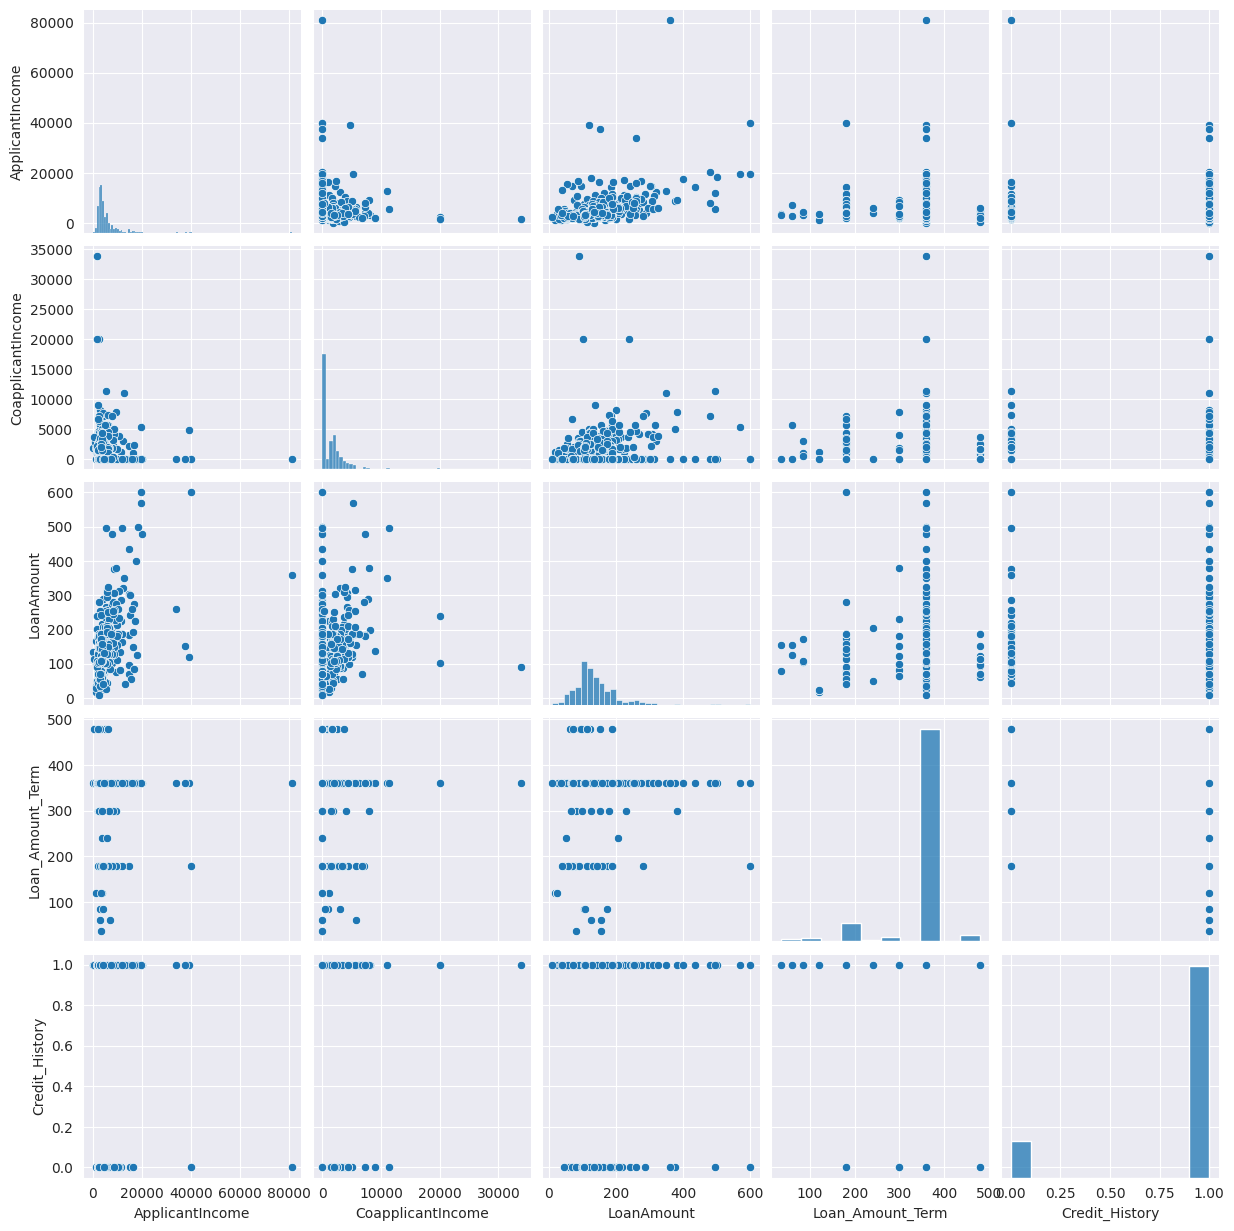

In [15]:
sns.pairplot(data=df)
plt.show()

## *Encoding Categorical Features*

In [16]:
le=LabelEncoder()
for column in categorical_cols:
    df[column] = le.fit_transform(df[column])

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Creating a heatmap to show the Correlation in the Dataset

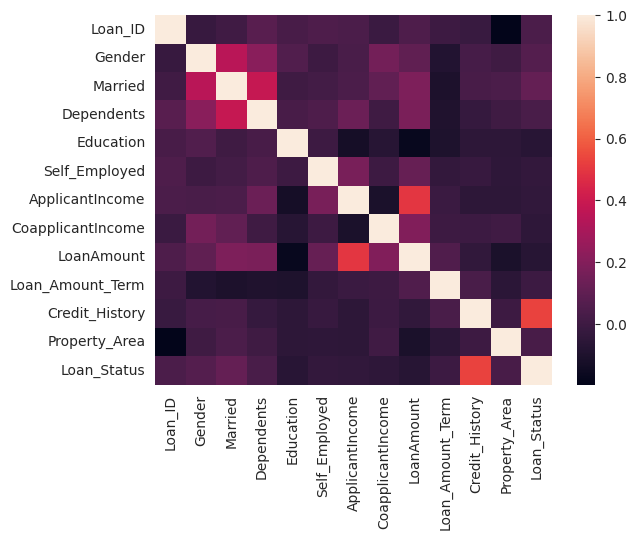

In [18]:
correlation=df.corr()
sns.heatmap(correlation)
plt.show()

## **Determining The Features and Target**

In [19]:
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

## **Split Data into train and test Data**

In [49]:
train_x,test_x,train_y,test_y=train_test_split(x , y ,test_size=0.33,random_state=42)

# **Performing Scaling using MinMax Scaler**

In [50]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

# **<u>Applying Three ML Algorithms :-</u>**

# At first, we will use Logistic Regression Algorithm with 10000 iterations:-


In [76]:
model_1=LogisticRegression(max_iter=10000)

## **Training The Model**

In [77]:
model_1.fit(train_x,train_y)
y_pred_logr=model_1.predict(train_x)

## **Testing The Model**

In [78]:
y_hat_logr=model_1.predict(test_x)

## **Computing The Training and Testing Accuracy , Recall , Precesion and F1_Score**

In [79]:
Training_accuracy_logr=accuracy_score(y_pred_logr,train_y)
print('Training Accuracy',Training_accuracy_logr)

Testing_accuracy_logr=accuracy_score(y_hat_logr,test_y)
print('Testing Accuracy',Testing_accuracy_logr)

print(50*"*")

Recall_Logr=recall_score(y_hat_logr,test_y)
print('Recall ',Recall_Logr)

Precision_Logr=precision_score(y_hat_logr,test_y)
print('Precision ',Precision_Logr)

F1_score_Logr=f1_score(y_hat_logr,test_y)
print('F1_score ',F1_score_Logr)



Training Accuracy 0.8130841121495327
Testing Accuracy 0.7987421383647799
**************************************************
Recall  0.7777777777777778
Precision  1.0
F1_score  0.8750000000000001


# Then we use Naive Bayes Classifier (Gaussian NB)

In [80]:
model_2=GaussianNB()

## **Training The Model**

In [81]:
model_2.fit(train_x,train_y)
y_pred_GNB=model_2.predict(train_x)

## **Testing The Model**

In [82]:
y_hat_GNB=model_2.predict(test_x)

## **Computing The Training and Testing Accuracy , Recall , Precision and F1_score**

In [83]:
Training_accuracy_GNB=accuracy_score(y_pred_GNB,train_y)
print('Training Accuracy',Training_accuracy_GNB)

Testing_accuracy_GNB=accuracy_score(y_hat_GNB,test_y)
print('Testing Accuracy',Testing_accuracy_GNB)

print(50*"*")

Recall_GNB=recall_score(y_hat_GNB,test_y)
print('Recall ',Recall_GNB)

Precision_GNB=precision_score(y_hat_GNB,test_y)
print('Precision ',Precision_GNB)

F1_score_GNB=f1_score(y_hat_GNB,test_y)
print('F1_score ',F1_score_GNB)


Training Accuracy 0.8006230529595015
Testing Accuracy 0.7987421383647799
**************************************************
Recall  0.7857142857142857
Precision  0.9821428571428571
F1_score  0.873015873015873


# **After That , we build The KNN Model**

# *Firstly , we need to determine the Best K Value For Our Model*

In [84]:
k_values=[1,3,4,5,7,9]
accuracy_n_neighbors=[]
for k in k_values :
    KNN_model=KNeighborsClassifier(n_neighbors = k)
    KNN_model.fit(train_x,train_y)
    y_pred_KNN = KNN_model.predict(train_x)
    accuracy = accuracy_score(train_y, y_pred_KNN)
    print("accuracy when k = ", k, ' : ', accuracy)
accuracy_n_neighbors.append(accuracy)

accuracy when k =  1  :  1.0
accuracy when k =  3  :  0.8411214953271028
accuracy when k =  4  :  0.8348909657320872
accuracy when k =  5  :  0.8099688473520249
accuracy when k =  7  :  0.8130841121495327
accuracy when k =  9  :  0.8099688473520249


## **Training The Model With the Best Value of K**

In [85]:
KNN_model = KNeighborsClassifier(n_neighbors =3)

In [86]:
KNN_model.fit(train_x,train_y)
y_pred_KNN=KNN_model.predict(train_x)

## **Testing The Model**

In [87]:
y_hat_KNN=KNN_model.predict(test_x)

## **Computing The Training and Testing Accuracy , Recall , Precision and F1_score**

In [88]:
Training_accuracy_KNN=accuracy_score(y_pred_KNN,train_y)
print('Training Accuracy',Training_accuracy_KNN)

Testing_accuracy_KNN=accuracy_score(y_hat_KNN,test_y)
print('Testing Accuracy',Testing_accuracy_KNN)

print(50*"*")

Recall_KNN=recall_score(y_hat_KNN,test_y)
print('Recall ',Recall_KNN)

Precision_KNN=precision_score(y_hat_KNN,test_y)
print('Precision ',Precision_KNN)

F1_score_KNN=f1_score(y_hat_KNN,test_y)
print('F1_score ',F1_score_KNN)

Training Accuracy 0.8411214953271028
Testing Accuracy 0.7924528301886793
**************************************************
Recall  0.7883211678832117
Precision  0.9642857142857143
F1_score  0.8674698795180723


# <u>Comparative Analysis :-</u>

### We create a grouped bar plot comparing different evaluation metrics (accuracy, recall, F1-score, and precision) for our three models. Each model's metrics are represented by differently colored bars, with labels indicating the corresponding metrics. The plot provides a visual comparison of the performance of the models across these metrics.

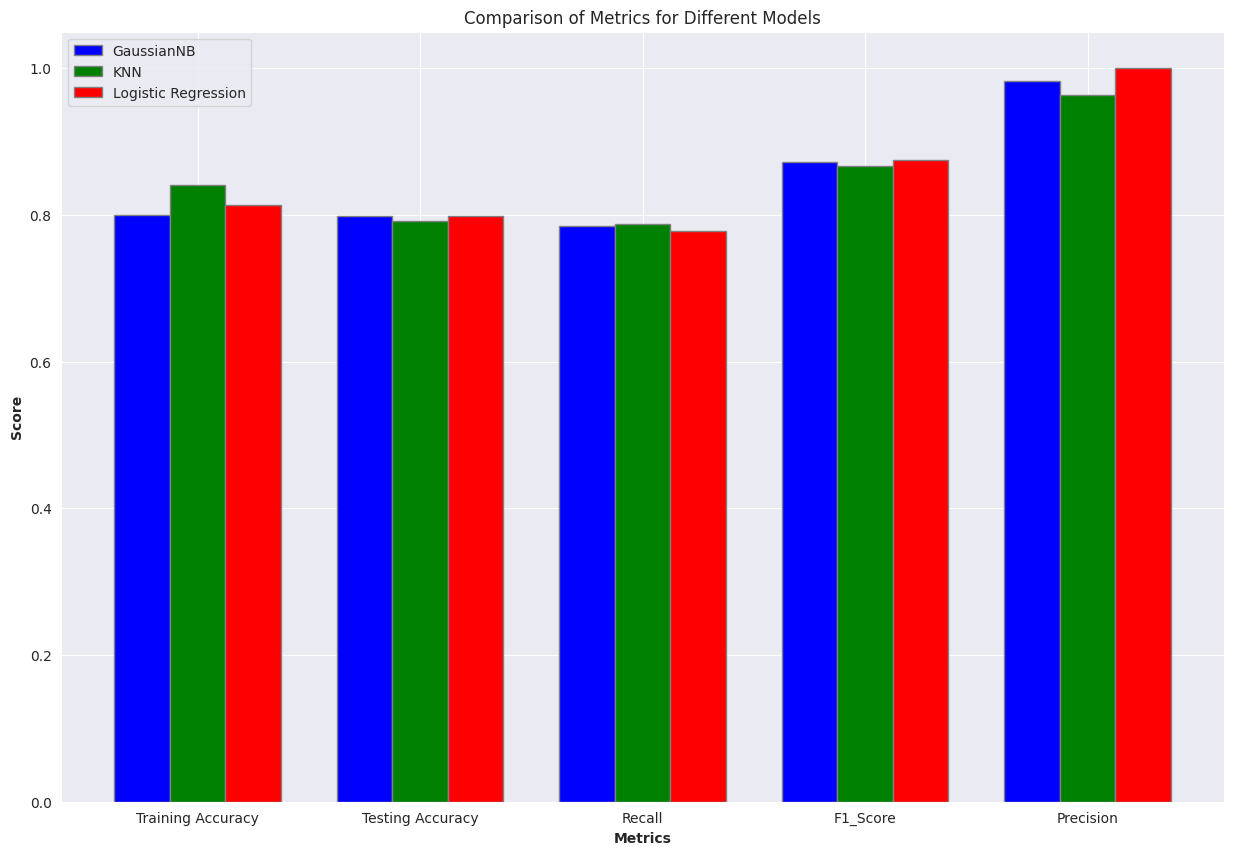

In [94]:
metrics_GaussianNB = [Training_accuracy_GNB, Testing_accuracy_GNB, Recall_GNB, F1_score_GNB, Precision_GNB]
metrics_KNN = [Training_accuracy_KNN, Testing_accuracy_KNN, Recall_KNN, F1_score_KNN, Precision_KNN]
metrics_Logr = [Training_accuracy_logr, Testing_accuracy_logr, Recall_Logr, F1_score_Logr, Precision_Logr]

labels = ['Training Accuracy', 'Testing Accuracy', 'Recall', 'F1_Score', 'Precision']

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15,10))
# Create bars
plt.bar(r1, metrics_GaussianNB, color='b', width=bar_width, edgecolor='grey', label='GaussianNB')
plt.bar(r2, metrics_KNN, color='g', width=bar_width, edgecolor='grey', label='KNN')
plt.bar(r3, metrics_Logr, color='r', width=bar_width, edgecolor='grey', label='Logistic Regression')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

# Add ylabel
plt.ylabel('Score', fontweight='bold')

# Add title
plt.title('Comparison of Metrics for Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()